In [2]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json


file_dir = "/data03/sunyi/time_constrained_cot/outputs/2_6"
model_list = [
    # "NovaSky-AI/Sky-T1-32B-Preview",
    "Qwen/QwQ-32B-Preview",
    # "Qwen/Qwen2.5-32B-Instruct",
    # "Qwen/Qwen2.5-14B-Instruct", 
    # "Qwen/Qwen2.5-7B-Instruct", 
    # "Qwen/Qwen2.5-3B-Instruct", 
    # "Qwen/Qwen2.5-1.5B-Instruct",
    # "Qwen/Qwen2.5-Math-1.5B-Instruct",
    # "Qwen/Qwen2.5-Math-7B-Instruct",
    # "mistralai/Mistral-Small-Instruct-2409",
    # "mistralai/Mistral-Nemo-Instruct-2407",
    # "mistralai/Ministral-8B-Instruct-2410",
    # "mistralai/Mathstral-7B-v0.1",
    "google/gemma-2-27b-it",
    # "google/gemma-2-9b-it",
    # "google/gemma-2-2b-it",
    # "microsoft/Phi-3-medium-128k-instruct",
    # "microsoft/Phi-3-small-128k-instruct",
    # "microsoft/Phi-3-mini-128k-instruct",
    # "microsoft/Phi-3.5-mini-instruct",
    "microsoft/phi-4",
    # "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    # "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    # "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
    # "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
    # "meta-llama/Llama-3.2-3B-Instruct",
    # "meta-llama/Llama-3.2-1B-Instruct",
    # "meta-llama/Llama-3.1-8B-Instruct"
]

In [3]:
# PROMP_LIST = [ "-c2f-budget", "-aav-budget", "-sbs-budget", "-aav-budget-hard", "-c2f-budget-hard", "-sbs-budget-hard"]

# findings1
# PROMP_LIST = [ "-c2f", "-sbs", "-aav", "-sbs-hard", "-c2f-hard", "-aav-hard"]
PROMP_LIST1 = [ "-sbs","-sbs-hard"]
PROMP_LIST2 = [ "-c2f","-c2f-hard"]
PROMP_LIST3 = [ "-aav","-aav-hard"]


MODEL_SERIES_MAP = {
    "Qwen/QwQ-32B-Preview": "qwen",
    "Qwen/Qwen2.5-32B-Instruct": "qwen",
    "Qwen/Qwen2.5-14B-Instruct": "qwen",
    "Qwen/Qwen2.5-7B-Instruct": "qwen",
    "Qwen/Qwen2.5-3B-Instruct": "qwen",
    "Qwen/Qwen2.5-1.5B-Instruct": "qwen",
    "Qwen/Qwen2.5-Math-1.5B-Instruct": "qwen-math",
    "Qwen/Qwen2.5-Math-7B-Instruct": "qwen-math",
    # "internlm/internlm2_5-1_8b-chat": "internlm",
    # "internlm/internlm2_5-7b-chat": "internlm",
    # "internlm/internlm2_5-20b-chat": "internlm",
    "google/gemma-2-2b-it": "gemma",
    "google/gemma-2-9b-it": "gemma",
    "google/gemma-2-27b-it": "gemma",
    "mistralai/Mathstral-7B-v0.1": "mistral",
    "mistralai/Ministral-8B-Instruct-2410": "mistral",
    "mistralai/Mistral-Nemo-Instruct-2407": "mistral",
    "mistralai/Mistral-Small-Instruct-2409": "mistral",
    "microsoft/phi-4": "phi4",
    "microsoft/Phi-3-medium-128k-instruct": "phi3medium",
    "microsoft/Phi-3-small-128k-instruct": "phi3small",
    "microsoft/Phi-3.5-mini-instruct": "phi3mini",
    "microsoft/Phi-3-mini-128k-instruct": "phi3mini",
    "NovaSky-AI/Sky-T1-32B-Preview": "qwen",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B": "deepseek-r1-distill",
    "meta-llama/Llama-3.2-3B-Instruct": "llama",
    "meta-llama/Llama-3.2-1B-Instruct": "llama",
    "meta-llama/Llama-3.1-8B-Instruct": "llama"
}


MODEL_SERIES_PROMPT_TYPE_MAP1 = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST1],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST1],
    "internlm": ["internlm"+prompt for prompt in PROMP_LIST1],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST1],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST1],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST1],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST1],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST1],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST1],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in PROMP_LIST1],
    "llama": ["llama"+prompt for prompt in PROMP_LIST1]
}
MODEL_SERIES_PROMPT_TYPE_MAP2 = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST2],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST2],
    "internlm": ["internlm"+prompt for prompt in PROMP_LIST2],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST2],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST2],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST2],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST2],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST2],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST2],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in PROMP_LIST2],
    "llama": ["llama"+prompt for prompt in PROMP_LIST2]
}
MODEL_SERIES_PROMPT_TYPE_MAP3 = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST3],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST3],
    "internlm": ["internlm"+prompt for prompt in PROMP_LIST3],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST3],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST3],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST3],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST3],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST3],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST3],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in PROMP_LIST3],
    "llama": ["llama"+prompt for prompt in PROMP_LIST3]
}

In [4]:
def gen_budget_list(budget, data_name, model):
    if budget == -1:
        return [-1]
    elif budget == 1:
        o1_like_models = [
            "Qwen/QwQ-32B-Preview", 
            "Skywork/Skywork-o1-Open-Llama-3.1-8B", 
            "PowerInfer/SmallThinker-3B-Preview",
            "NovaSky-AI/Sky-T1-32B-Preview", 
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
            "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
        ]
        if model in o1_like_models: # maybe should extend to longer sequence
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 100):
                    budget_list.append(i)
                for i in range(600, 3601, 200):
                    budget_list.append(i)
        else:    
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 601, 50):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 300, 75):
                    budget_list.append(i)
                for i in range(300, 600, 100):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)

        
        return budget_list

In [5]:
dataset = "gsm8k"   
something = "_-1_seed0_t0.0_s0_e-1"

In [6]:
model_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list1 = MODEL_SERIES_PROMPT_TYPE_MAP1[MODEL_SERIES_MAP[model]]
    model_prompt_list2 = MODEL_SERIES_PROMPT_TYPE_MAP2[MODEL_SERIES_MAP[model]]
    model_prompt_list3 = MODEL_SERIES_PROMPT_TYPE_MAP3[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list1:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    for prompt_type in model_prompt_list2:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    for prompt_type in model_prompt_list3:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

model_acc_dicts

{'Qwen/QwQ-32B-Preview': {'qwen-sbs': [35.4,
   36.2,
   36.5,
   37.5,
   41.5,
   45.7,
   51.0,
   60.0,
   65.8,
   71.0,
   75.7,
   80.1,
   84.8,
   89.0,
   91.0,
   93.7,
   94.5,
   94.6,
   94.8,
   95.5,
   95.3,
   95.5,
   95.5,
   95.2],
  'qwen-sbs-hard': [1.6,
   2.5,
   2.4,
   3.0,
   2.8,
   3.9,
   7.7,
   11.9,
   14.3,
   20.8,
   24.9,
   30.4,
   35.1,
   43.8,
   48.9,
   55.6,
   62.3,
   66.5,
   74.8,
   82.5,
   85.5,
   88.2,
   89.6,
   90.9],
  'qwen-c2f': [36.4,
   41.0,
   46.4,
   52.5,
   60.0,
   64.9,
   70.7,
   75.5,
   78.5,
   80.7,
   85.1,
   86.5,
   90.2,
   91.5,
   93.3,
   94.3,
   94.8,
   95.2,
   95.5,
   95.7,
   96.1,
   96.3,
   96.1,
   96.4],
  'qwen-c2f-hard': [1.2,
   1.9,
   5.9,
   12.9,
   17.1,
   19.2,
   20.2,
   19.1,
   18.4,
   18.9,
   19.3,
   20.1,
   25.6,
   36.2,
   44.0,
   54.4,
   61.5,
   67.5,
   77.1,
   84.8,
   88.0,
   91.3,
   92.9,
   94.1],
  'qwen-aav': [38.5,
   40.3,
   45.6,
   49.5,
   53.1,
   

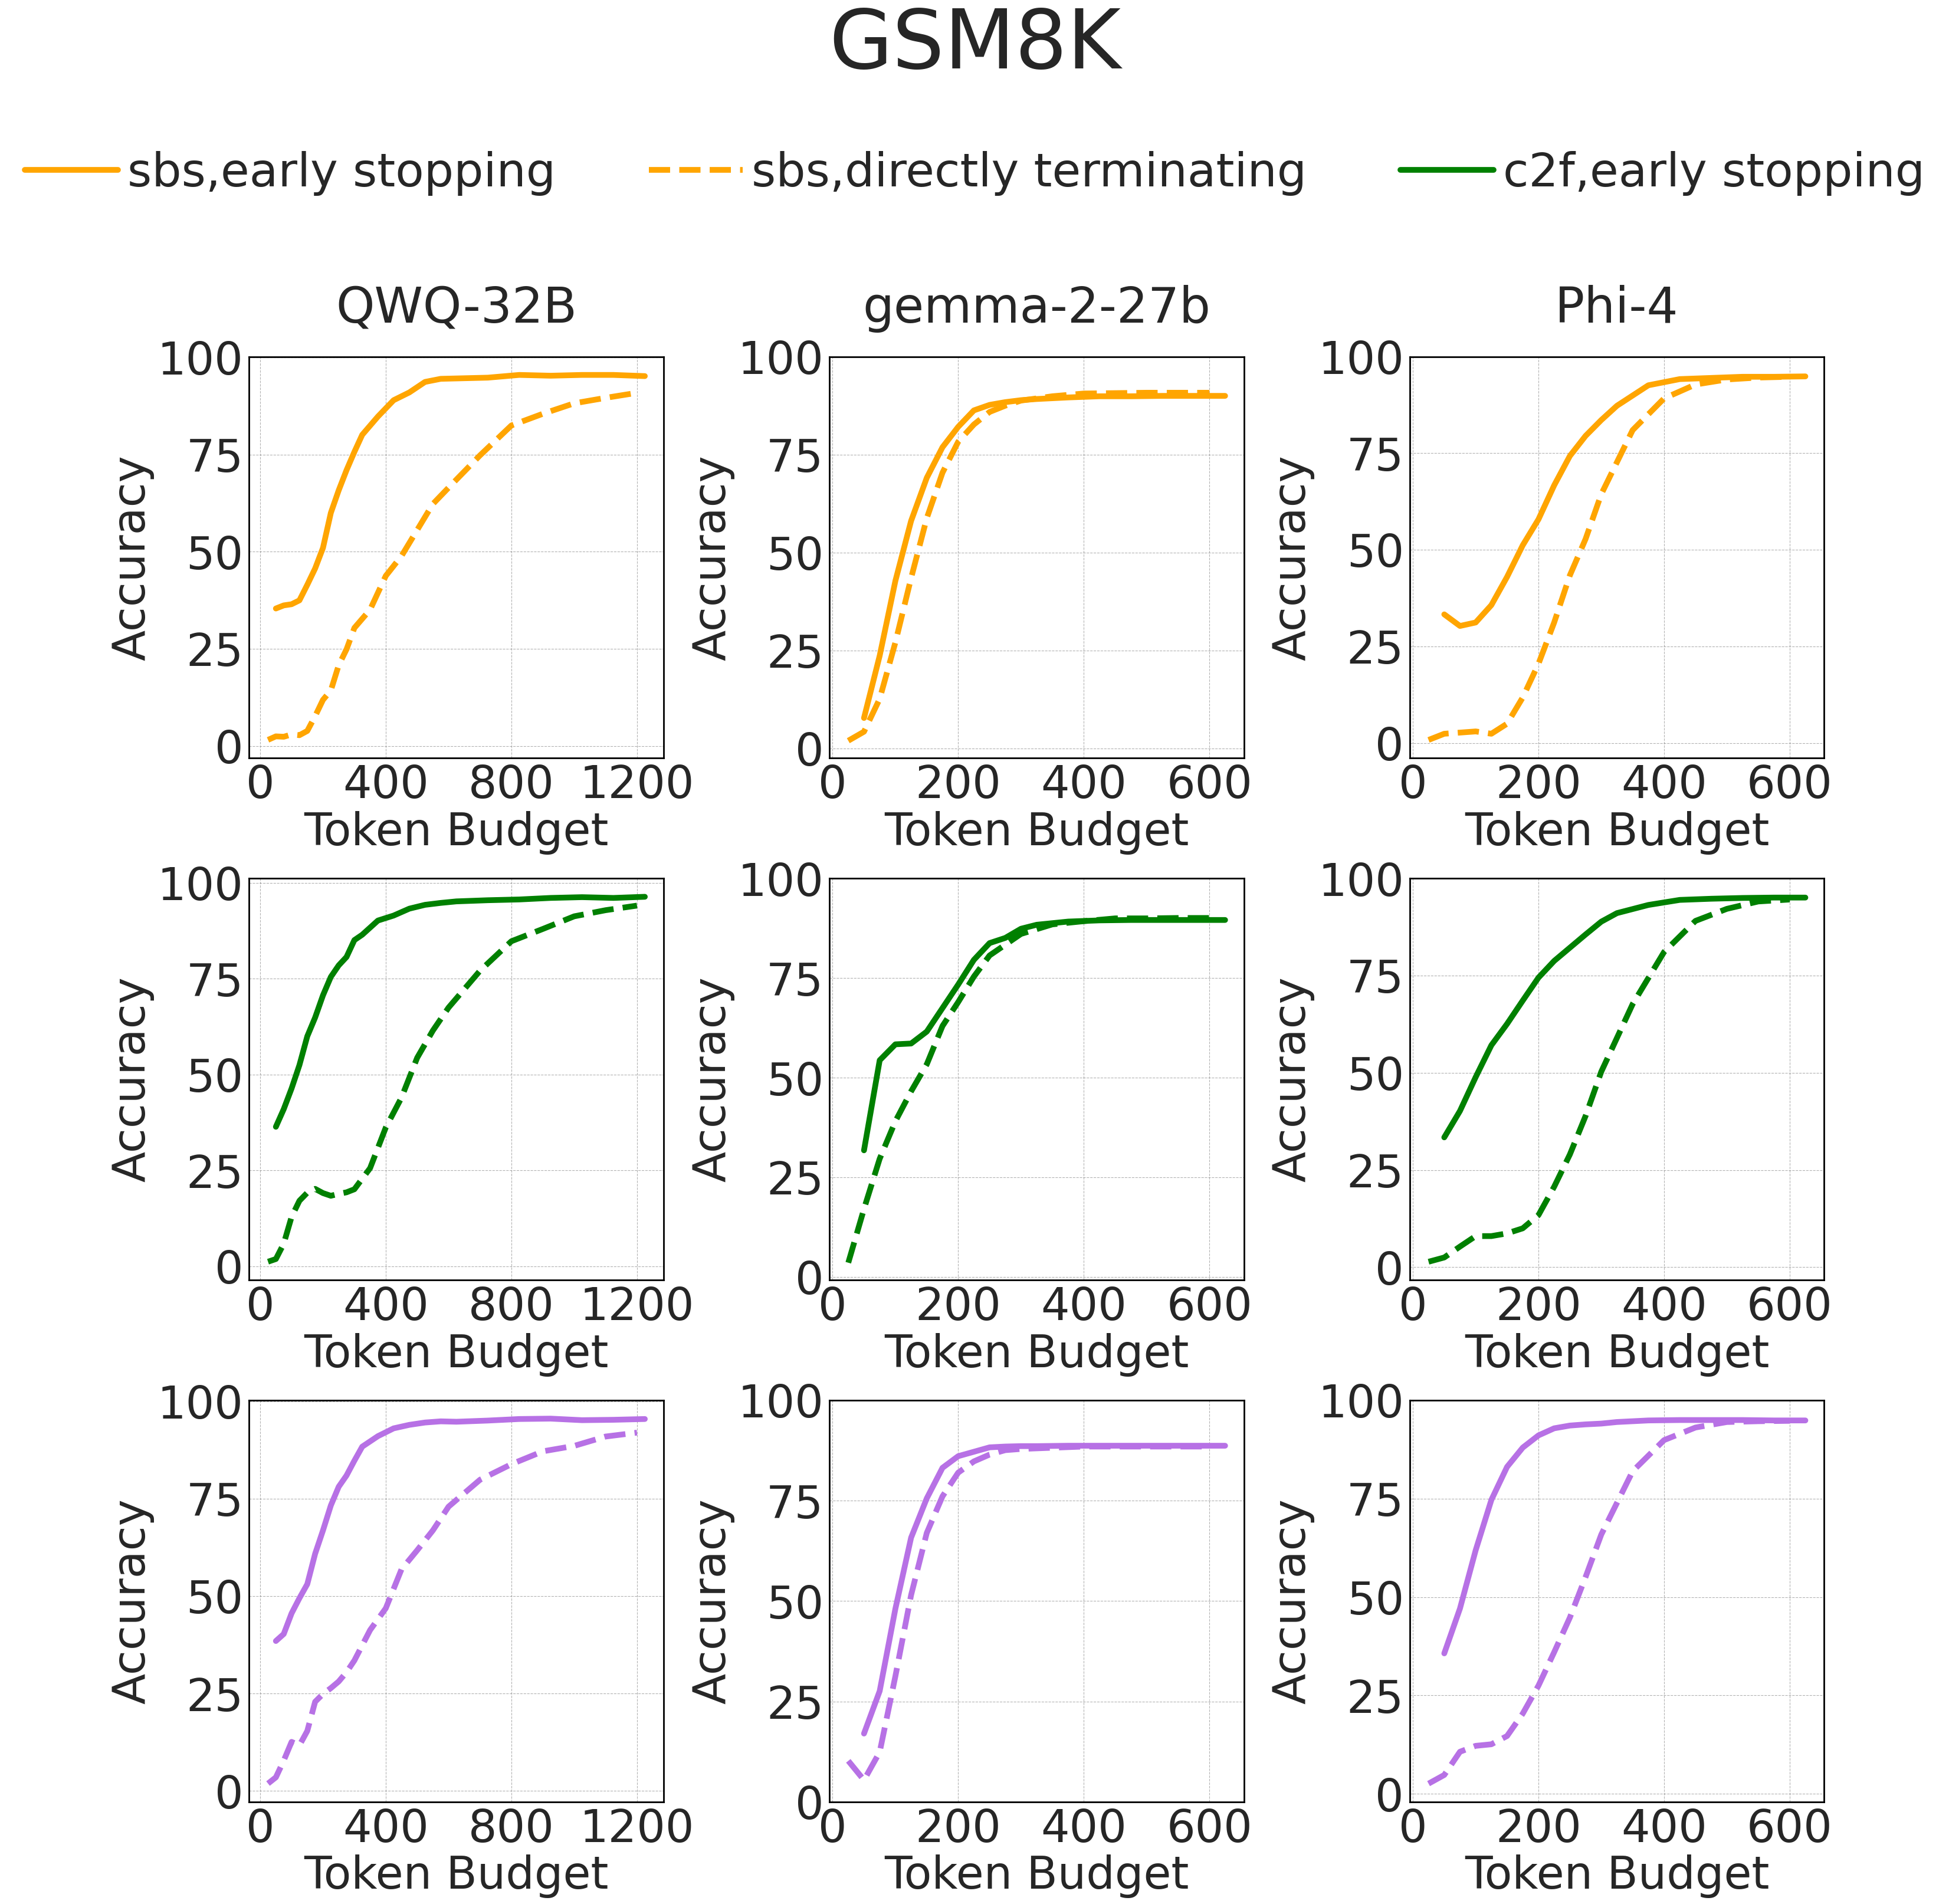

In [7]:
import seaborn as sns

# Set Seaborn style
sns.set_style(style="whitegrid", rc={"grid.linewidth": 8, "grid.color": "0.5"})


fig, axs = plt.subplots(3, 3, figsize=(30, 35))
line_width = 7   # Set the desired line width
line_shape = {
    "hard": "--",
    "budget": "-.",
    "else": "-"
}
color = {
    "sbs": "orange",
    "c2f": "green",
    "aav": "#B771E5"
}
# set the title
fig.suptitle(f"{dataset}".upper(), fontsize=100, y=0.93)

# Set background color for the figure and axes
# fig.patch.set_facecolor('#f0f0f0')  # Light gray background for the figure
# Flatten the axes array for easy iteration
axs = axs.flatten()
# for ax in axs:
#     ax.set_facecolor('#f0f0f0') 
# Plot all lines first without labels
A = 55
B = 60
for index, model in enumerate(model_list):
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP1[MODEL_SERIES_MAP[model]] + MODEL_SERIES_PROMPT_TYPE_MAP2[MODEL_SERIES_MAP[model]] + MODEL_SERIES_PROMPT_TYPE_MAP3[MODEL_SERIES_MAP[model]]    
    
    for prompt_type in model_prompt_list:
        if "sbs-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="orange", linewidth=line_width)
        elif "c2f-hard" in prompt_type:
            axs[index+3].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="green", linewidth=line_width)
        elif "aav-hard" in prompt_type:
            axs[index+6].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="#B771E5", linewidth=line_width)    
        elif "sbs" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="orange",linewidth=line_width)
        elif "c2f" in prompt_type:
            axs[index+3].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="green",linewidth=line_width)
        elif "aav" in prompt_type:
            axs[index+6].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="#B771E5", linewidth=line_width)
        
        axs[index].set_xlabel("Token Budget", fontsize=A)
        axs[index].set_ylabel("Accuracy", fontsize=A)
        if index == 0:
            axs[index].set_title(
                "QWQ-32B", 
                fontsize=B,
                pad=20,              # Space between title and plot
                y=1.02,             # Vertical position (1.0 is default)
                x=0.5,              # Horizontal position (0.5 is center)
                ha='center',        # Horizontal alignment
                va='bottom'         # Vertical alignment
            )
            
            # axs[index + 3].set_title(f"{model.split('/')[-1]}", fontsize=B)
            # axs[index + 6].set_title(f"{model.split('/')[-1]}", fontsize=B) 
            axs[index].set_yticks(range(0, 101, 25))  
            axs[index + 3].set_yticks(range(0, 101, 25))
            axs[index + 6].set_yticks(range(0, 101, 25))
            axs[index].set_xticks(range(0, 1201, 400)) 
            axs[index + 3].set_xticks(range(0, 1201, 400))
            axs[index + 6].set_xticks(range(0, 1201, 400))
        elif index == 1:
            axs[index].set_title(
                "gemma-2-27b", 
                fontsize=B,
                pad=20,              # Space between title and plot
                y=1.02,             # Vertical position (1.0 is default)
                x=0.5,              # Horizontal position (0.5 is center)
                ha='center',        # Horizontal alignment
                va='bottom'         # Vertical alignment
            )
            # axs[index + 3].set_title("Gemma-2-27b-it", fontsize=B)
            # axs[index + 6].set_title("Gemma-2-27b-it", fontsize=B)
            axs[index].set_yticks(range(0, 101, 25))  
            axs[index + 3].set_yticks(range(0, 101, 25))
            axs[index + 6].set_yticks(range(0, 101, 25))
            axs[index].set_xticks(range(0, 601, 200)) 
            axs[index + 3].set_xticks(range(0, 601, 200))
            axs[index + 6].set_xticks(range(0, 601, 200))
        elif index == 2:
            axs[index].set_title(
                "Phi-4", 
                fontsize=B,
                pad=20,              # Space between title and plot
                y=1.02,             # Vertical position (1.0 is default)
                x=0.5,              # Horizontal position (0.5 is center)
                ha='center',        # Horizontal alignment
                va='bottom'         # Vertical alignment
            )
            # axs[index + 3].set_title("Phi-4", fontsize=B)
            # axs[index + 6].set_title("Phi-4", fontsize=B)
            axs[index].set_yticks(range(0, 101, 25))  
            axs[index + 3].set_yticks(range(0, 101, 25))
            axs[index + 6].set_yticks(range(0, 101, 25))
            axs[index].set_xticks(range(0, 601, 200)) 
            axs[index + 3].set_xticks(range(0, 601, 200))
            axs[index + 6].set_xticks(range(0, 601, 200))

        axs[index + 3].set_xlabel("Token Budget", fontsize=A)
        axs[index + 3].set_ylabel("Accuracy", fontsize=A)
        axs[index + 6].set_xlabel("Token Budget", fontsize=A)
        axs[index + 6].set_ylabel("Accuracy", fontsize=A)

        
        axs[index].tick_params(axis='both', which='major', labelsize=A)
        axs[index + 3].tick_params(axis='both', which='major', labelsize=A)
        axs[index + 6].tick_params(axis='both', which='major', labelsize=A)
        
        # Add gridlines
        axs[index].grid(True, linestyle='--', alpha=0.6)
        axs[index + 3].grid(True, linestyle='--', alpha=0.6)
        axs[index + 6].grid(True, linestyle='--', alpha=0.6)


for ax in axs:
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('black')

from matplotlib.lines import Line2D
legend_lines = [
    Line2D([0], [0], color='orange', linestyle='-', linewidth=line_width, label='sbs,early stopping'),
    Line2D([0], [0], color='orange', linestyle='--', linewidth=line_width, label='sbs,directly terminating'),
    Line2D([0], [0], color='green', linestyle='-', linewidth=line_width, label='c2f,early stopping'),
    # Line2D([0], [0], color='green', linestyle='--', linewidth=line_width, label='c2f,directly terminating'),
    # Line2D([0], [0], color='#B771E5', linestyle='-', linewidth=line_width, label='aav,early stopping'),
    # Line2D([0], [0], color='#B771E5', linestyle='--', linewidth=line_width, label='aav,directly terminating')
]

# Add single legend to figure
fig.legend(handles=legend_lines,
        loc='upper center',
        bbox_to_anchor=(0.5, 0.88),
        ncol=6,
        columnspacing=2.0,      # Adjust spacing between columns (default is 2.0)
        handletextpad=0.2,      # Adjust spacing between line and text (default is 0.8)
        borderpad=0.4,          # Adjust internal padding (default is 0.4)
        fontsize=B-3,
        frameon=False,
        fancybox=False,
        shadow=True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(
    left=0.09,      # Left margin
    right=0.98,     # Right margin
    bottom=0.06,    # Bottom margin
    top=0.76,       # Top margin
    wspace=0.4,    # Width spacing between subplots
    hspace=0.3     # Height spacing between subplots
)
plt.savefig("gsm8k.pdf")

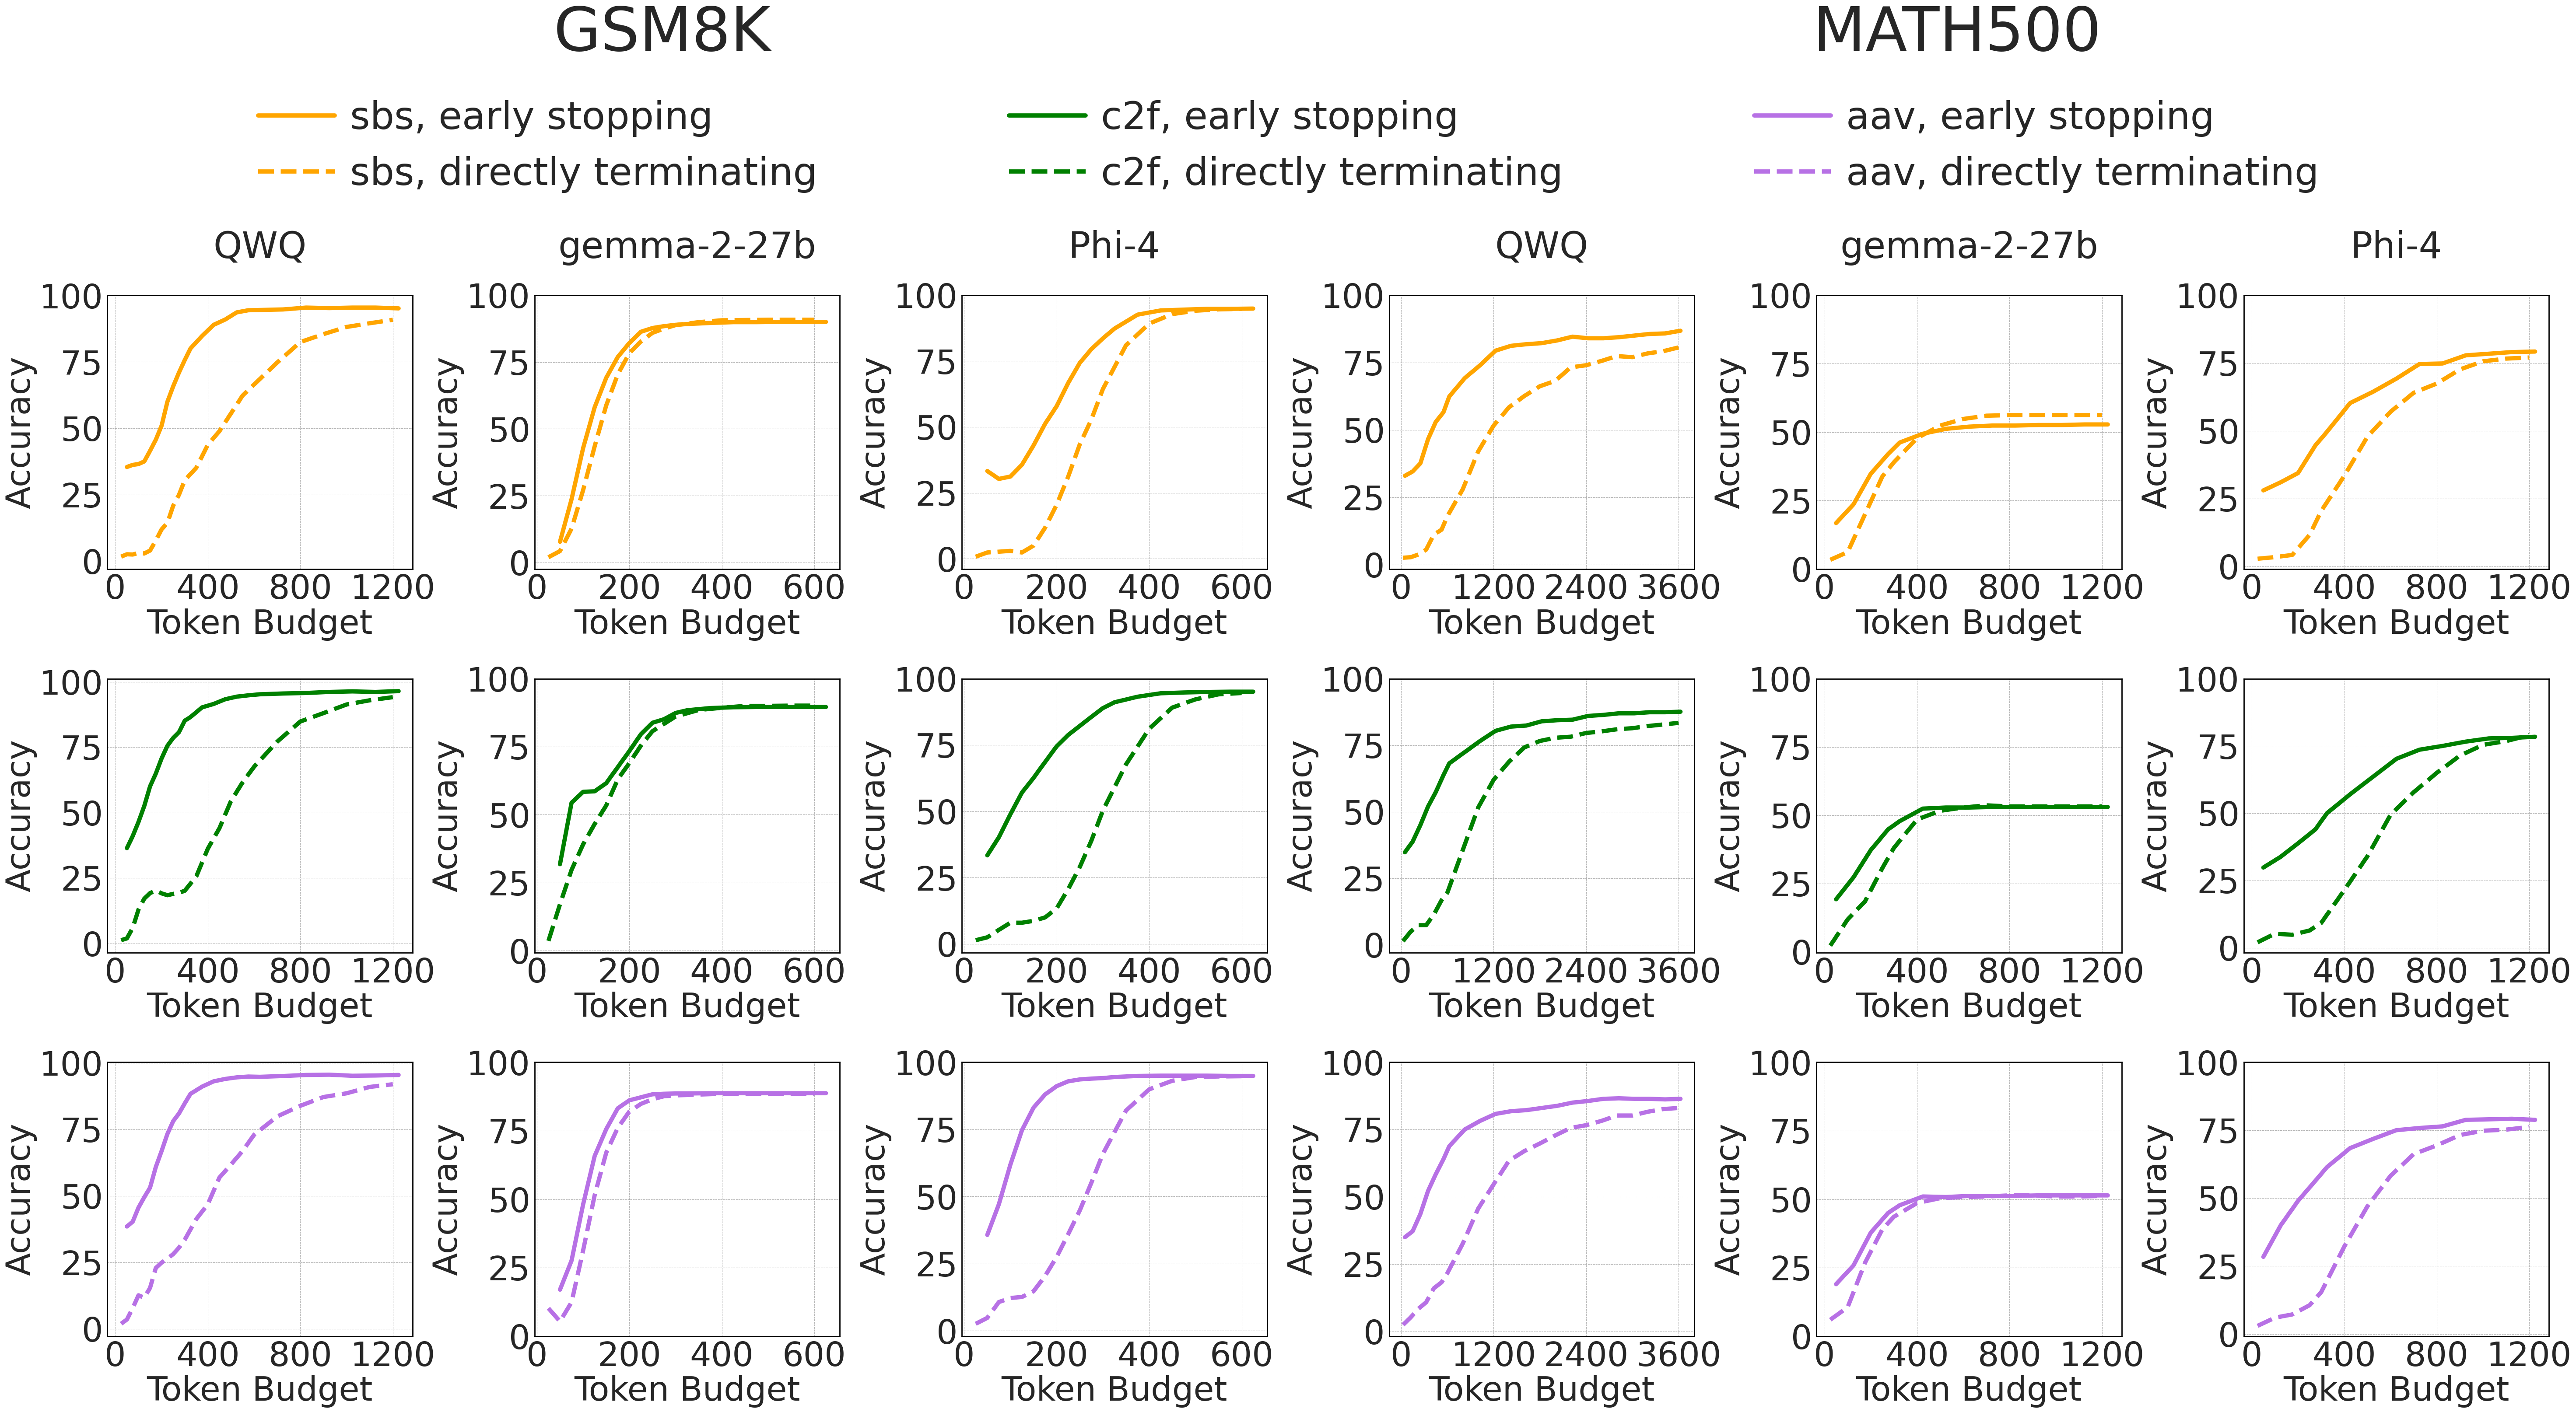

In [8]:
import seaborn as sns

# Set Seaborn style
sns.set_style(style="whitegrid", rc={"grid.linewidth": 8, "grid.color": "0.5"})


fig, axs = plt.subplots(3, 6, figsize=(60, 35))
line_width = 7   # Set the desired line width
line_shape = {
    "hard": "--",
    "budget": "-.",
    "else": "-"
}
color = {
    "sbs": "orange",
    "c2f": "green",
    "aav": "#B771E5"
}
# set the title
fig.suptitle("    GSM8K                                                      MATH500", fontsize=100, y=0.93)

# Set background color for the figure and axes
# fig.patch.set_facecolor('#f0f0f0')  # Light gray background for the figure
# Flatten the axes array for easy iteration
axs = axs.flatten()
# for ax in axs:
#     ax.set_facecolor('#f0f0f0') 
# Plot all lines first without labels
A = 55
B = 60
for index, model in enumerate(model_list):
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP1[MODEL_SERIES_MAP[model]] + MODEL_SERIES_PROMPT_TYPE_MAP2[MODEL_SERIES_MAP[model]] + MODEL_SERIES_PROMPT_TYPE_MAP3[MODEL_SERIES_MAP[model]]    
    
    for prompt_type in model_prompt_list:
        if "sbs-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="orange", linewidth=line_width)
        elif "c2f-hard" in prompt_type:
            axs[index+6].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="green", linewidth=line_width)
        elif "aav-hard" in prompt_type:
            axs[index+12].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="#B771E5", linewidth=line_width)    
        elif "sbs" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="orange",linewidth=line_width)
        elif "c2f" in prompt_type:
            axs[index+6].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="green",linewidth=line_width)
        elif "aav" in prompt_type:
            axs[index+12].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="#B771E5", linewidth=line_width)
        
        axs[index].set_xlabel("Token Budget", fontsize=A)
        axs[index].set_ylabel("Accuracy", fontsize=A)
        if index == 0:
            axs[index].set_title(
                "QWQ", 
                fontsize=B,
                pad=40,              # Space between title and plot
                y=1.02,             # Vertical position (1.0 is default)
                x=0.5,              # Horizontal position (0.5 is center)
                ha='center',        # Horizontal alignment
                va='bottom'         # Vertical alignment
            )
            
            # axs[index + 3].set_title(f"{model.split('/')[-1]}", fontsize=B)
            # axs[index + 6].set_title(f"{model.split('/')[-1]}", fontsize=B) 
            axs[index].set_yticks(range(0, 101, 25))  
            axs[index + 6].set_yticks(range(0, 101, 25))
            axs[index + 12].set_yticks(range(0, 101, 25))
            axs[index].set_xticks(range(0, 1201, 400)) 
            axs[index + 6].set_xticks(range(0, 1201, 400))
            axs[index + 12].set_xticks(range(0, 1201, 400))
        elif index == 1:
            axs[index].set_title(
                "gemma-2-27b", 
                fontsize=B,
                pad=40,              # Space between title and plot
                y=1.02,             # Vertical position (1.0 is default)
                x=0.5,              # Horizontal position (0.5 is center)
                ha='center',        # Horizontal alignment
                va='bottom'         # Vertical alignment
            )
            # axs[index + 3].set_title("Gemma-2-27b-it", fontsize=B)
            # axs[index + 6].set_title("Gemma-2-27b-it", fontsize=B)
            axs[index].set_yticks(range(0, 101, 25))  
            axs[index + 6].set_yticks(range(0, 101, 25))
            axs[index + 12].set_yticks(range(0, 101, 25))
            axs[index].set_xticks(range(0, 601, 200)) 
            axs[index + 6].set_xticks(range(0, 601, 200))
            axs[index + 12].set_xticks(range(0, 601, 200))
        elif index == 2:
            axs[index].set_title(
                "Phi-4", 
                fontsize=B,
                pad=40,              # Space between title and plot
                y=1.02,             # Vertical position (1.0 is default)
                x=0.5,              # Horizontal position (0.5 is center)
                ha='center',        # Horizontal alignment
                va='bottom'         # Vertical alignment
            )
            # axs[index + 3].set_title("Phi-4", fontsize=B)
            # axs[index + 6].set_title("Phi-4", fontsize=B)
            axs[index].set_yticks(range(0, 101, 25))  
            axs[index + 6].set_yticks(range(0, 101, 25))
            axs[index + 12].set_yticks(range(0, 101, 25))
            axs[index].set_xticks(range(0, 601, 200)) 
            axs[index + 6].set_xticks(range(0, 601, 200))
            axs[index + 12].set_xticks(range(0, 601, 200))

        axs[index + 6].set_xlabel("Token Budget", fontsize=A)
        axs[index + 6].set_ylabel("Accuracy", fontsize=A)
        axs[index + 12].set_xlabel("Token Budget", fontsize=A)
        axs[index + 12].set_ylabel("Accuracy", fontsize=A)

        
        axs[index].tick_params(axis='both', which='major', labelsize=A)
        axs[index + 6].tick_params(axis='both', which='major', labelsize=A)
        axs[index + 12].tick_params(axis='both', which='major', labelsize=A)
        
        # Add gridlines
        axs[index].grid(True, linestyle='--', alpha=0.6)
        axs[index + 6].grid(True, linestyle='--', alpha=0.6)
        axs[index + 12].grid(True, linestyle='--', alpha=0.6)

dataset = "math500"   
something = "_-1_seed0_t0.0_s0_e-1"
model_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list1 = MODEL_SERIES_PROMPT_TYPE_MAP1[MODEL_SERIES_MAP[model]]
    model_prompt_list2 = MODEL_SERIES_PROMPT_TYPE_MAP2[MODEL_SERIES_MAP[model]]
    model_prompt_list3 = MODEL_SERIES_PROMPT_TYPE_MAP3[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list1:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    for prompt_type in model_prompt_list2:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    for prompt_type in model_prompt_list3:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

model_acc_dicts

for index, model in enumerate(model_list):
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP1[MODEL_SERIES_MAP[model]] + MODEL_SERIES_PROMPT_TYPE_MAP2[MODEL_SERIES_MAP[model]] + MODEL_SERIES_PROMPT_TYPE_MAP3[MODEL_SERIES_MAP[model]]    
    
    for prompt_type in model_prompt_list:
        if "sbs-hard" in prompt_type:
            axs[index+3].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="orange", linewidth=line_width)
        elif "c2f-hard" in prompt_type:
            axs[index+6+3].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="green", linewidth=line_width)
        elif "aav-hard" in prompt_type:
            axs[index+12+3].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="#B771E5", linewidth=line_width)    
        elif "sbs" in prompt_type:
            axs[index+3].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="orange",linewidth=line_width)
        elif "c2f" in prompt_type:
            axs[index+6+3].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="green",linewidth=line_width)
        elif "aav" in prompt_type:
            axs[index+12+3].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="#B771E5", linewidth=line_width)
        
        axs[index+3].set_xlabel("Token Budget", fontsize=A)
        axs[index+3].set_ylabel("Accuracy", fontsize=A)
        if index == 0:
            axs[index+3].set_title(
                "QWQ", 
                fontsize=B,
                pad=40,              # Space between title and plot
                y=1.02,             # Vertical position (1.0 is default)
                x=0.5,              # Horizontal position (0.5 is center)
                ha='center',        # Horizontal alignment
                va='bottom'         # Vertical alignment
            )
            
            # axs[index + 3].set_title(f"{model.split('/')[-1]}", fontsize=B)
            # axs[index + 6].set_title(f"{model.split('/')[-1]}", fontsize=B) 
            axs[index+3].set_yticks(range(0, 101, 25))  
            axs[index + 6+3].set_yticks(range(0, 101, 25))
            axs[index + 12+3].set_yticks(range(0, 101, 25))
            axs[index+3].set_xticks(range(0, 3601, 1200)) 
            axs[index + 6+3].set_xticks(range(0, 3601, 1200))
            axs[index + 12+3].set_xticks(range(0, 3601, 1200))
        elif index == 1:
            axs[index+3].set_title(
                "gemma-2-27b", 
                fontsize=B,
                pad=40,              # Space between title and plot
                y=1.02,             # Vertical position (1.0 is default)
                x=0.5,              # Horizontal position (0.5 is center)
                ha='center',        # Horizontal alignment
                va='bottom'         # Vertical alignment
            )
            # axs[index + 3].set_title("Gemma-2-27b-it", fontsize=B)
            # axs[index + 6].set_title("Gemma-2-27b-it", fontsize=B)
            axs[index+3].set_yticks(range(0, 101, 25))  
            axs[index + 6+3].set_yticks(range(0, 101, 25))
            axs[index + 12+3].set_yticks(range(0, 101, 25))
            axs[index+3].set_xticks(range(0, 1201, 400)) 
            axs[index + 6+3].set_xticks(range(0, 1201, 400))
            axs[index + 12+3].set_xticks(range(0, 1201, 400))
        elif index == 2:
            axs[index+3].set_title(
                "Phi-4", 
                fontsize=B,
                pad=40,              # Space between title and plot
                y=1.02,             # Vertical position (1.0 is default)
                x=0.5,              # Horizontal position (0.5 is center)
                ha='center',        # Horizontal alignment
                va='bottom'         # Vertical alignment
            )
            # axs[index + 3].set_title("Phi-4", fontsize=B)
            # axs[index + 6].set_title("Phi-4", fontsize=B)
            axs[index+3].set_yticks(range(0, 101, 25))  
            axs[index + 6+3].set_yticks(range(0, 101, 25))
            axs[index + 12+3].set_yticks(range(0, 101, 25))
            axs[index+3].set_xticks(range(0, 1201, 400)) 
            axs[index + 6+3].set_xticks(range(0, 1201, 400))
            axs[index + 12+3].set_xticks(range(0, 1201, 400))

        axs[index + 6+3].set_xlabel("Token Budget", fontsize=A)
        axs[index + 6+3].set_ylabel("Accuracy", fontsize=A)
        axs[index + 12+3].set_xlabel("Token Budget", fontsize=A)
        axs[index + 12+3].set_ylabel("Accuracy", fontsize=A)

        
        axs[index+3].tick_params(axis='both', which='major', labelsize=A)
        axs[index + 6+3].tick_params(axis='both', which='major', labelsize=A)
        axs[index + 12+3].tick_params(axis='both', which='major', labelsize=A)
        
        # Add gridlines
        axs[index+3].grid(True, linestyle='--', alpha=0.6)
        axs[index + 6+3].grid(True, linestyle='--', alpha=0.6)
        axs[index + 12+3].grid(True, linestyle='--', alpha=0.6)


for ax in axs:
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('black')



for ax in axs:
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('black')

from matplotlib.lines import Line2D
legend_lines = [
    # First column - sbs
    Line2D([0], [0], color='orange', linestyle='-', linewidth=line_width, label='sbs, early stopping'),
    Line2D([0], [0], color='orange', linestyle='--', linewidth=line_width, label='sbs, directly terminating'),
    
    # Second column - c2f
    Line2D([0], [0], color='green', linestyle='-', linewidth=line_width, label='c2f, early stopping'),
    Line2D([0], [0], color='green', linestyle='--', linewidth=line_width, label='c2f, directly terminating'),
    
    # Third column - aav
    Line2D([0], [0], color='#B771E5', linestyle='-', linewidth=line_width, label='aav, early stopping'),
    Line2D([0], [0], color='#B771E5', linestyle='--', linewidth=line_width, label='aav, directly terminating')
]

# Add single legend to figure
fig.legend(handles=legend_lines,
        loc='upper center',
        bbox_to_anchor=(0.5, 0.89),
        ncol=3,
        columnspacing=5.0,      # Adjust spacing between columns (default is 2.0)
        handletextpad=0.4,      # Adjust spacing between line and text (default is 0.8)
        borderpad=0.4,          # Adjust internal padding (default is 0.4)
        fontsize=B+3,
        frameon=False,
        fancybox=False,
        shadow=True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(
    left=0.05,      # Left margin
    right=0.98,     # Right margin
    bottom=0.06,    # Bottom margin
    top=0.74,       # Top margin
    wspace=0.4,    # Width spacing between subplots
    hspace=0.4     # Height spacing between subplots
)
plt.savefig("findings1.pdf")

In [9]:
dataset = "math500"   
something = "_-1_seed0_t0.0_s0_e-1"

In [10]:
model_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list1 = MODEL_SERIES_PROMPT_TYPE_MAP1[MODEL_SERIES_MAP[model]]
    model_prompt_list2 = MODEL_SERIES_PROMPT_TYPE_MAP2[MODEL_SERIES_MAP[model]]
    model_prompt_list3 = MODEL_SERIES_PROMPT_TYPE_MAP3[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list1:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    for prompt_type in model_prompt_list2:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    for prompt_type in model_prompt_list3:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

model_acc_dicts

{'Qwen/QwQ-32B-Preview': {'qwen-sbs': [33.0,
   34.6,
   37.6,
   46.6,
   53.0,
   56.6,
   62.4,
   69.2,
   74.0,
   79.4,
   81.2,
   81.8,
   82.2,
   83.2,
   84.6,
   84.0,
   84.0,
   84.4,
   85.0,
   85.6,
   85.8,
   86.8],
  'qwen-sbs-hard': [2.6,
   2.8,
   3.8,
   5.6,
   11.2,
   13.0,
   18.0,
   28.0,
   42.0,
   51.6,
   58.4,
   62.6,
   66.2,
   68.2,
   73.2,
   74.0,
   75.6,
   77.4,
   77.0,
   78.4,
   79.2,
   80.6],
  'qwen-c2f': [34.8,
   38.8,
   45.0,
   52.0,
   57.4,
   63.8,
   68.2,
   72.4,
   76.6,
   80.4,
   82.0,
   82.4,
   84.0,
   84.4,
   84.6,
   86.0,
   86.4,
   87.0,
   87.0,
   87.4,
   87.4,
   87.6],
  'qwen-c2f-hard': [1.4,
   5.0,
   7.4,
   7.4,
   11.4,
   16.8,
   19.6,
   35.6,
   51.6,
   62.0,
   68.8,
   74.2,
   76.6,
   77.8,
   78.2,
   79.6,
   80.2,
   81.0,
   81.4,
   82.2,
   82.8,
   83.4],
  'qwen-aav': [35.0,
   37.2,
   43.6,
   52.2,
   58.4,
   64.0,
   68.8,
   75.0,
   78.2,
   80.8,
   81.8,
   82.2,
   83.0,
 

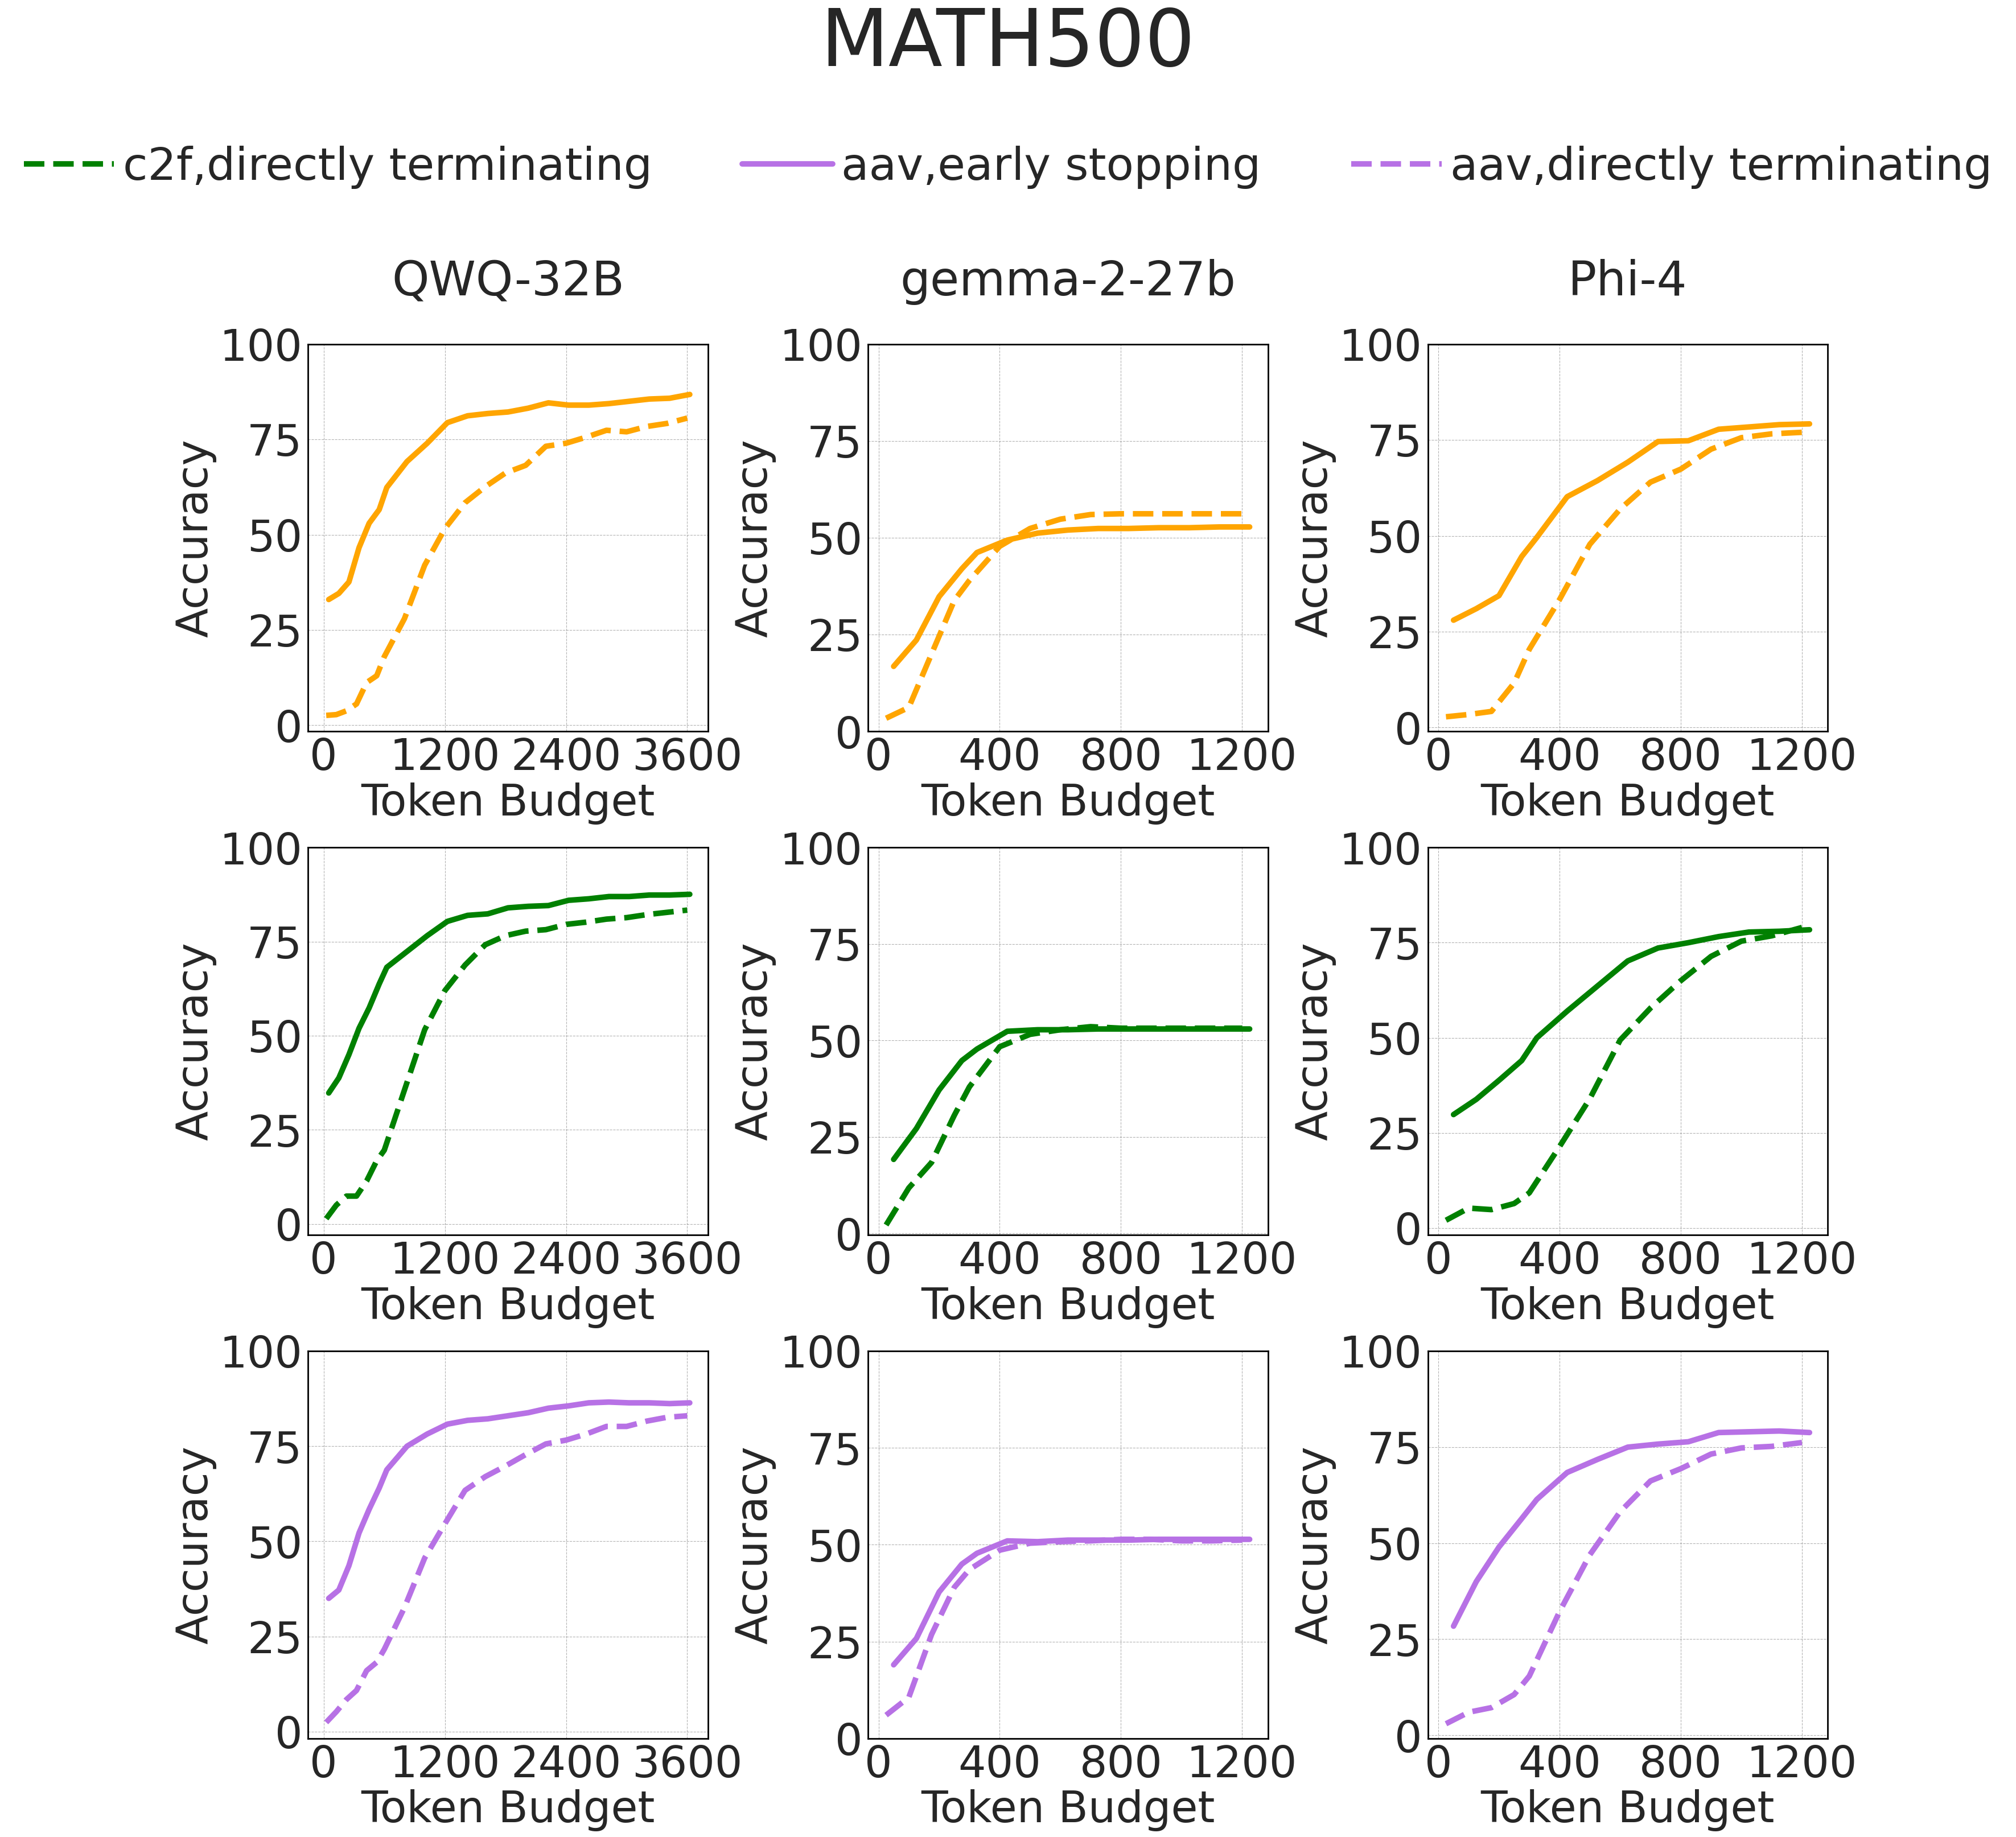

In [11]:
import seaborn as sns

# Set Seaborn style
sns.set_style(style="whitegrid", rc={"grid.linewidth": 8, "grid.color": "0.5"})


fig, axs = plt.subplots(3, 3, figsize=(30, 35))
line_width = 7   # Set the desired line width
line_shape = {
    "hard": "--",
    "budget": "-.",
    "else": "-"
}
color = {
    "sbs": "orange",
    "c2f": "green",
    "aav": "#B771E5"
}
# set the title
fig.suptitle(f"{dataset}".upper(), fontsize=100, y=0.93)

# Set background color for the figure and axes
# fig.patch.set_facecolor('#f0f0f0')  # Light gray background for the figure
# Flatten the axes array for easy iteration
axs = axs.flatten()
# for ax in axs:
#     ax.set_facecolor('#f0f0f0') 
# Plot all lines first without labels
A = 55
B = 60
for index, model in enumerate(model_list):
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP1[MODEL_SERIES_MAP[model]] + MODEL_SERIES_PROMPT_TYPE_MAP2[MODEL_SERIES_MAP[model]] + MODEL_SERIES_PROMPT_TYPE_MAP3[MODEL_SERIES_MAP[model]]    
    
    for prompt_type in model_prompt_list:
        if "sbs-hard" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="orange", linewidth=line_width)
        elif "c2f-hard" in prompt_type:
            axs[index+3].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="green", linewidth=line_width)
        elif "aav-hard" in prompt_type:
            axs[index+6].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle='--', color="#B771E5", linewidth=line_width)    
        elif "sbs" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="orange",linewidth=line_width)
        elif "c2f" in prompt_type:
            axs[index+3].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="green",linewidth=line_width)
        elif "aav" in prompt_type:
            axs[index+6].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="#B771E5", linewidth=line_width)
        
        axs[index].set_xlabel("Token Budget", fontsize=A)
        axs[index].set_ylabel("Accuracy", fontsize=A)
        if index == 0:
            axs[index].set_title(
                "QWQ-32B", 
                fontsize=B,
                pad=40,              # Space between title and plot
                y=1.02,             # Vertical position (1.0 is default)
                x=0.5,              # Horizontal position (0.5 is center)
                ha='center',        # Horizontal alignment
                va='bottom'         # Vertical alignment
            )
            
            # axs[index + 3].set_title(f"{model.split('/')[-1]}", fontsize=B)
            # axs[index + 6].set_title(f"{model.split('/')[-1]}", fontsize=B) 
            axs[index].set_yticks(range(0, 101, 25))  
            axs[index + 3].set_yticks(range(0, 101, 25))
            axs[index + 6].set_yticks(range(0, 101, 25))
            axs[index].set_xticks(range(0, 3601, 1200)) 
            axs[index + 3].set_xticks(range(0, 3601, 1200))
            axs[index + 6].set_xticks(range(0, 3601, 1200))
        elif index == 1:
            axs[index].set_title(
                "gemma-2-27b", 
                fontsize=B,
                pad=40,              # Space between title and plot
                y=1.02,             # Vertical position (1.0 is default)
                x=0.5,              # Horizontal position (0.5 is center)
                ha='center',        # Horizontal alignment
                va='bottom'         # Vertical alignment
            )
            # axs[index + 3].set_title("Gemma-2-27b-it", fontsize=B)
            # axs[index + 6].set_title("Gemma-2-27b-it", fontsize=B)
            axs[index].set_yticks(range(0, 101, 25))  
            axs[index + 3].set_yticks(range(0, 101, 25))
            axs[index + 6].set_yticks(range(0, 101, 25))
            axs[index].set_xticks(range(0, 1201, 400)) 
            axs[index + 3].set_xticks(range(0, 1201, 400))
            axs[index + 6].set_xticks(range(0, 1201, 400))
        elif index == 2:
            axs[index].set_title(
                "Phi-4", 
                fontsize=B,
                pad=40,              # Space between title and plot
                y=1.02,             # Vertical position (1.0 is default)
                x=0.5,              # Horizontal position (0.5 is center)
                ha='center',        # Horizontal alignment
                va='bottom'         # Vertical alignment
            )
            # axs[index + 3].set_title("Phi-4", fontsize=B)
            # axs[index + 6].set_title("Phi-4", fontsize=B)
            axs[index].set_yticks(range(0, 101, 25))  
            axs[index + 3].set_yticks(range(0, 101, 25))
            axs[index + 6].set_yticks(range(0, 101, 25))
            axs[index].set_xticks(range(0, 1201, 400)) 
            axs[index + 3].set_xticks(range(0, 1201, 400))
            axs[index + 6].set_xticks(range(0, 1201, 400))

        axs[index + 3].set_xlabel("Token Budget", fontsize=A)
        axs[index + 3].set_ylabel("Accuracy", fontsize=A)
        axs[index + 6].set_xlabel("Token Budget", fontsize=A)
        axs[index + 6].set_ylabel("Accuracy", fontsize=A)

        
        axs[index].tick_params(axis='both', which='major', labelsize=A)
        axs[index + 3].tick_params(axis='both', which='major', labelsize=A)
        axs[index + 6].tick_params(axis='both', which='major', labelsize=A)
        
        # Add gridlines
        axs[index].grid(True, linestyle='--', alpha=0.6)
        axs[index + 3].grid(True, linestyle='--', alpha=0.6)
        axs[index + 6].grid(True, linestyle='--', alpha=0.6)


for ax in axs:
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('black')

from matplotlib.lines import Line2D
legend_lines = [
    # Line2D([0], [0], color='orange', linestyle='-', linewidth=line_width, label='sbs,early stopping'),
    # Line2D([0], [0], color='orange', linestyle='--', linewidth=line_width, label='sbs,directly terminating'),
    # Line2D([0], [0], color='green', linestyle='-', linewidth=line_width, label='c2f,early stopping'),
    Line2D([0], [0], color='green', linestyle='--', linewidth=line_width, label='c2f,directly terminating'),
    Line2D([0], [0], color='#B771E5', linestyle='-', linewidth=line_width, label='aav,early stopping'),
    Line2D([0], [0], color='#B771E5', linestyle='--', linewidth=line_width, label='aav,directly terminating')
]

fig.legend(handles=legend_lines,
        loc='upper center',
        bbox_to_anchor=(0.5, 0.88),
        ncol=6,
        columnspacing=2.0,      # Adjust spacing between columns (default is 2.0)
        handletextpad=0.2,      # Adjust spacing between line and text (default is 0.8)
        borderpad=0.4,          # Adjust internal padding (default is 0.4)
        fontsize=B-3,
        frameon=False,
        fancybox=False,
        shadow=True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(
    left=0.09,      # Left margin
    right=0.98,     # Right margin
    bottom=0.06,    # Bottom margin
    top=0.76,       # Top margin
    wspace=0.4,    # Width spacing between subplots
    hspace=0.3     # Height spacing between subplots
)
plt.savefig("math500.pdf")   